# **ЛАБ 5**

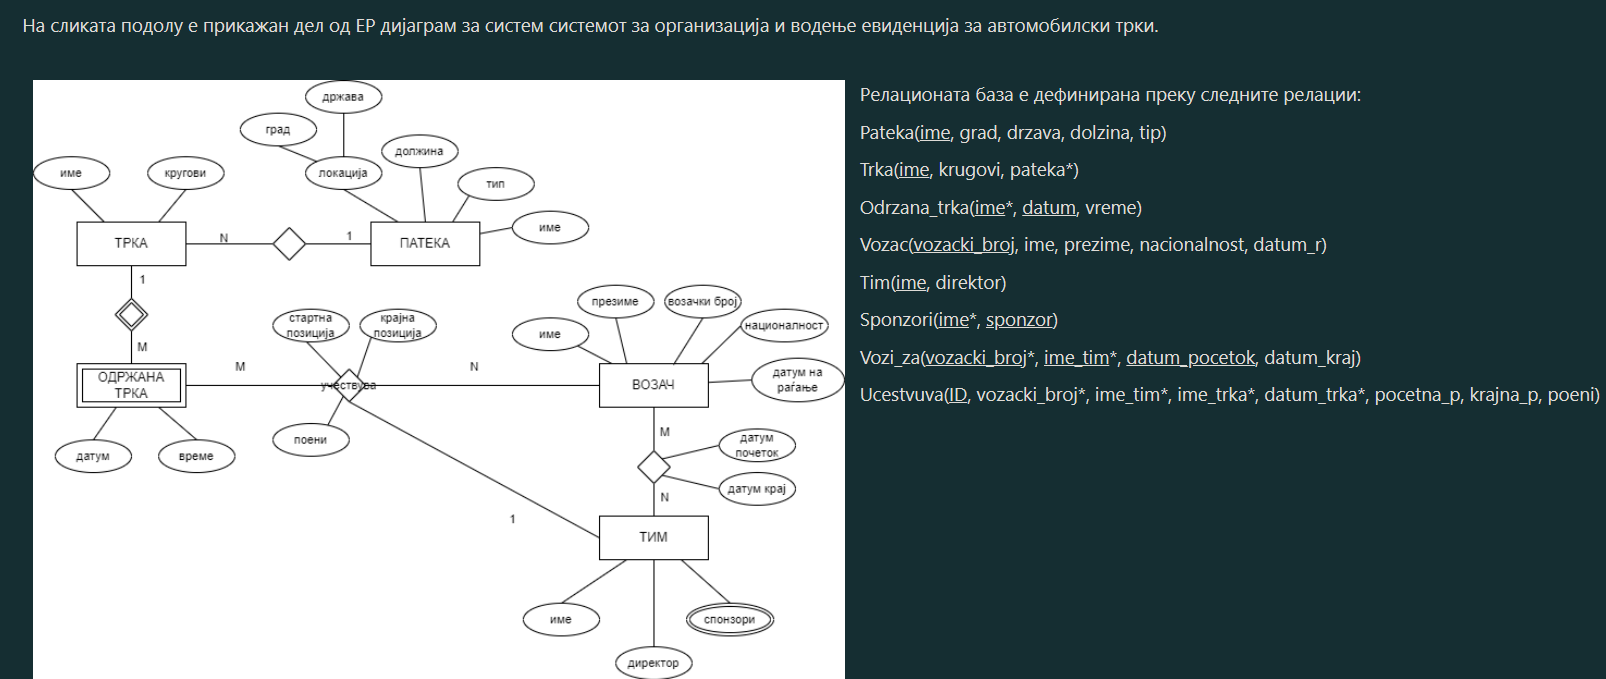

**1\. Да се напишат соодветните DDL изрази за ентитетните множества „TРКА“, „ОДРЖАНА\_ТРКА“ и „УЧЕСТВУВА“, како и за евентуалните релации кои произлегуваат од истите, доколку треба да бидат исполнети следните барања:**

- **Сакаме да водиме евиденција за учествата на трки од возачи кои се избришани од системот, но не сакаме да водиме евиденција за учествата на трки од тимови кои се избришани од системот.**
- **Само возачите кои ја завршиле трката на првите 10 позиции добиваат поени (останатите добиваат 0 поени).** 
- **Трката не смее да има повеќе од 80 кругови.**

<span style="scrollbar-color: rgb(69, 74, 77) rgb(32, 35, 36); box-sizing: border-box; font-weight: bolder; font-size: 0.9375rem;">Забелешка</span><span style="scrollbar-color: rgb(69, 74, 77) rgb(32, 35, 36); box-sizing: border-box; font-size: 0.9375rem;">: Табелите и атрибутите потребно е да ги креирате со&nbsp;</span>  <span style="scrollbar-color: rgb(69, 74, 77) rgb(32, 35, 36); box-sizing: border-box; font-weight: bolder; font-size: 0.9375rem;">ИСТИТЕ ИМИЊА и ИСТИОТ РЕДОСЛЕД</span>  <span style="scrollbar-color: rgb(69, 74, 77) rgb(32, 35, 36); box-sizing: border-box; font-size: 0.9375rem;">&nbsp;како што е дадено во релациониот модел. За табелите кои веќе се креирани претпоставете дека примарните клучеви се од тип TEXT. За надворешните клучеви за кои не е наведено ограничување за референцијален интегритет се претпоставува каскадна промена/бришење. Конкретните вредности за датум дефинирајте ги како стринг во формат 'YYYY-MM-DD' (на пример "2024-02-08").</span>

In [ ]:
create table Trka
(
    ime     text primary key,
    krugovi int,
    pateka  text,
    foreign key (pateka) references Pateka (ime) on update cascade on delete cascade,
    constraint br_krugovi check ( krugovi <= 80 )
);

create table Odrzana_trka
(
    ime   text,
    datum text,
    vreme text,
    primary key (ime, datum),
    foreign key (ime) references Trka (ime) on update cascade on delete cascade
);

create table Ucestvuva
(
    ID           text,
    vozacki_broj text,
    ime_tim      text,
    ime_trka     text,
    datum_trka   text,
    pocetna_p    int,
    krajna_p     int,
    poeni        float(1),
    foreign key (vozacki_broj) references Vozac (vozacki_broj) on update cascade on delete set null,
    foreign key (ime_tim) references Tim (ime) on update cascade on delete cascade,
    foreign key (ime_trka, datum_trka) references Odrzana_trka (ime, datum) on update cascade on delete cascade,
    constraint br_poeni check ( (krajna_p > 10 and poeni = 0.0) or (krajna_p <= 10 and poeni > 0.0) )
)

<span style="font-size: 15px;"><b>2. Да се напише DML израз со кој ќе се вратат&nbsp; &nbsp;информациите за возачите кои во 2023 година освоиле (еден или повеќе) поени на одржани трки со помалку од 70 кругови подредени според датумот на раѓање по опаѓачки редослед.</b></span>

In [ ]:
with 
Trki2023 as
(
    select distinct Vozac.vozacki_broj, Vozac.ime, Vozac.prezime, Vozac.nacionalnost, Vozac.datum_r
    from Ucestvuva join Vozac on Ucestvuva.vozacki_broj = Vozac.vozacki_broj join Odrzana_trka on Ucestvuva.ime_trka = Odrzana_trka.ime join Trka on Odrzana_trka.ime = Trka.ime
    where Ucestvuva.datum_trka like '2023%' and Trka.krugovi < 70 and Ucestvuva.poeni > 0
    order by Vozac.datum_r desc
)

select * from Trki2023

**3\. Да се напише DML израз со кој  за секоја трка ќе се врати возачот кој има најмногу победи на таа трка.**

In [ ]:
with 
Pobedi as
(
    select vozacki_broj, ime_trka, sum(krajna_p) as pobedi
    from Ucestvuva
    where krajna_p = 1
    group by vozacki_broj, ime_trka
),
Max_poeni as
(
    select ime_trka, max(pobedi) as max_pobedi
    from Pobedi
    group by ime_trka
)

select Pobedi.ime_trka as race, Pobedi.vozacki_broj as driver
from Max_poeni join Pobedi on Max_poeni.ime_trka = Pobedi.ime_trka
where max_pobedi = pobedi   

**4. <span style="font-size: 0.9375rem; color: rgb(223, 220, 215); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Roboto, &quot;Helvetica Neue&quot;, Arial, &quot;Noto Sans&quot;, &quot;Liberation Sans&quot;, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;;">Да се напише/ат соодветниот/те тригер/и за одржување на референцијалниот интегритет на релацијата „</span><span style="font-size: 0.9375rem; color: rgb(223, 220, 215); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Roboto, &quot;Helvetica Neue&quot;, Arial, &quot;Noto Sans&quot;, &quot;Liberation Sans&quot;, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; scrollbar-color: rgb(69, 74, 77) rgb(32, 35, 36); box-sizing: border-box;">УЧЕСТВУВА</span><span style="font-size: 0.9375rem; color: rgb(223, 220, 215); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Roboto, &quot;Helvetica Neue&quot;, Arial, &quot;Noto Sans&quot;, &quot;Liberation Sans&quot;, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;;">“ доколку треба да се исполнети следните барања:</span>**

- **Сакаме да водиме евиденција за учествата на трки од возачи кои се избришани од системот.**
- **Не сакаме да водиме евиденција за учествата на трки од тимови кои се избришани од системот.**

In [ ]:
create trigger vozac_ucestva
    before delete
    on Vozac
    for each row
begin
    update Ucestvuva
    set vozacki_broj = null
    where Ucestvuva.vozacki_broj = old.vozacki_broj;
end;

create trigger tim_ucestva
    before delete
    on Tim
    for each row
begin
    delete from Ucestvuva
    where Ucestvuva.ime_tim = old.ime;
end;